In [1]:
import sys
sys.path.append("../../")
from simulation_classes.drones import Drones
from simulation_classes.simulation_setting import SimulationSettings
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### シミュレーターのスケーリングに必要な各種パラメータ
- 時間系
  - TOTAL_TIME: シミュレートする秒数
  - delta_t: 時間間隔
  - simulation_steps: 総ステップ数
- 距離のスケール
  - SCALING_FACTOR: [unit]を[m]に直すための係数。一旦これは定数で20にする。なので、simulation内で記述される速度 1 [unit/s]は20[m/s]に相当するということ。
- その他（運転系）
  - ドローン内に定義される変数ではあるが、max加速度とmin加速度は指定しても良いかもしれない。

In [2]:
TOTAL_TIME = 60
time_step = 0.1
simulation_steps = int(TOTAL_TIME / time_step)
scale_factor = 20


In [3]:
simulation = SimulationSettings(drone_num=1, TOTAL_TIME=TOTAL_TIME, time_step=time_step, scale_factor=scale_factor)

続いて速度に関してスケールした値を入れる。

In [5]:
simulation.test(1)

In [6]:
# いったんとりあえず動かす
leader = Drones(xcor=0, ycor = 0, v_0=0,a=1,c=2,legal_speed=2)

for i in range(simulation_steps):
  leader.leader_update(time_step)
  leader.record()


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

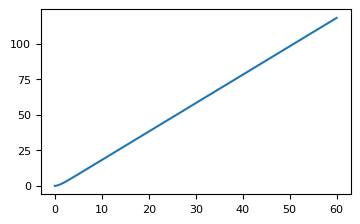

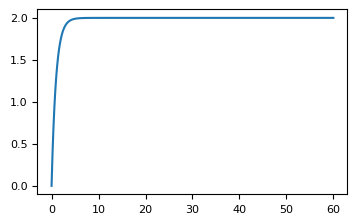

In [4]:
t = np.linspace(0,time_step*(simulation_steps), simulation_steps+1)

plt.figure(figsize=(4,2.4))
plt.plot(t,np.array(leader.xcorList))
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.figure(figsize=(4,2.4))
plt.plot(t,np.array(leader.v_xList))
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

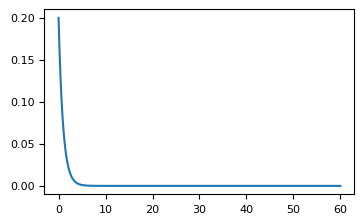

In [5]:
ax_list = np.diff(np.array(leader.v_xList))
t = np.linspace(0,time_step*(simulation_steps), simulation_steps)

plt.figure(figsize=(4,2.4))
plt.plot(t,ax_list)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)